<a href="https://colab.research.google.com/github/VoTanThinh/CNN/blob/main/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show(close=None, block=None)>

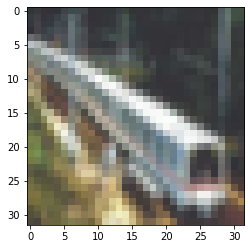

In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt                       #(32x32x3 có nghĩ là 3000 tín hiệu vào)

(x_train,y_train),(x_test,y_test) = cifar100.load_data()
hinh = x_train[6]
plt.imshow(hinh  , cmap=plt.cm.binary)                               
plt.show

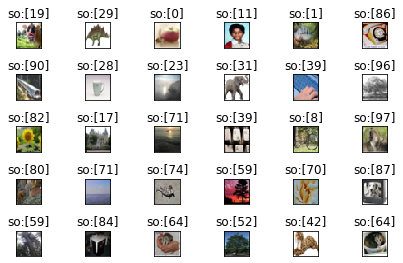

In [ ]:
for i in range(30):  # 30 hình ảnh
  plt.subplot(5,6,i+1) # 6 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray', interpolation='none')
  plt.title('so:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
x_train = x_train.reshape((50000,32*32*3)) # đầu tiên là t reset 500000 tấm ảnh và chuyển từ ảnh 2D thành ảnh 1D
x_train = x_train.astype('float32')/255        #chuyển qua mã array chuyển sang số thực           32*32*32 do 3 kênh màu
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255


In [ ]:
from keras.utils import to_categorical # chuyển qua one host encording mã hóa 1 số về số 1 dùng để chuyển cho output
y_train = to_categorical(y_train,100)  # 100 hình ảnh
y_test= to_categorical(y_test,100)

In [ ]:
#tạo mô hình
from keras.models import Sequential
from keras import models
from keras.layers import Dense         #dense :full conected ANN
model = Sequential()
model.add(Dense(1000,activation = 'relu', input_shape=(32*32*3,), name ='Lop1'))   # đầu ra  là 3000( do 32*32*3 tầm 3000 tín hiệu vào)( lớp 1)
model.add(Dense(3000,activation = 'relu',  name ='Lop2'))
model.add(Dense(2000,activation = 'relu',  name ='Lop3'))
model.add(Dense(1000,activation = 'relu', name ='Lop4'))
model.add(Dense(100, activation = 'softmax')) # lớp 2  đưa về 10 số nên lớp 2 khai báo là 10
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lop1 (Dense)                (None, 1000)              3073000   
                                                                 
 Lop2 (Dense)                (None, 3000)              3003000   
                                                                 
 Lop3 (Dense)                (None, 2000)              6002000   
                                                                 
 Lop4 (Dense)                (None, 1000)              2001000   
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
Total params: 14,179,100
Trainable params: 14,179,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import models
model.compile(optimizer='Adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train,y_train, epochs=10, batch_size=128)
test_loss,test_acc = model.evaluate(x_test,y_test)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/10
391/391 [==============================] - 164s 417ms/step - loss: 4.1380 - accuracy: 0.0620
Epoch 2/10
391/391 [==============================] - 153s 392ms/step - loss: 3.7524 - accuracy: 0.1181
Epoch 3/10
391/391 [==============================] - 152s 388ms/step - loss: 3.5476 - accuracy: 0.1525
Epoch 4/10
391/391 [==============================] - 150s 384ms/step - loss: 3.4142 - accuracy: 0.1768
Epoch 5/10
391/391 [==============================] - 150s 384ms/step - loss: 3.2997 - accuracy: 0.1992
Epoch 6/10
391/391 [==============================] - 149s 382ms/step - loss: 3.2033 - accuracy: 0.2124
Epoch 7/10
391/391 [==============================] - 154s 395ms/step - loss: 3.1140 - accuracy: 0.2285
Epoch 8/10
391/391 [==============================] - 151s 387ms/step - loss: 3.0219 - accuracy: 0.2439
Epoch 9/10
391/391 [==============================] - 151s 387ms/step - loss: 2.9249 - accuracy: 0.2604
Epoch 10/10
313/313 [==============================] - 12s 38ms/

In [ ]:
from google.colab import drive
from keras.models import load_model
model.save('/content/drive/MyDrive/model.h5')

In [ ]:
from keras.models import load_model
model100 = load_model('/content/drive/MyDrive/model.h5')

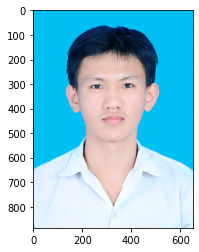

1/1 [==============================] - 0s 40ms/step


array([76])

In [ ]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/THINH.JPG')
plt.imshow(img)
plt.show()
img = load_img('/content/drive/MyDrive/THINH.JPG', target_size = (32,32)) 
#plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model100.predict(img),axis = -1)

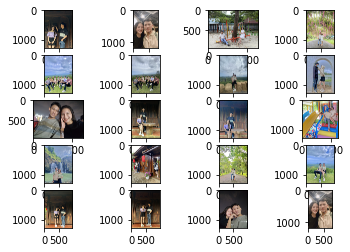

In [ ]:
from matplotlib.image import imread
folder='/content/drive/MyDrive/PICTURE_AI/'
for i in range(20):
  plt.subplot(5,4,i+1)
  filename=folder+'Thinh'+str(i)+'.jpg'
  img = imread(filename)
  plt.imshow(img)
plt.show()